In [1]:
import json
import pandas as pd

In [2]:
rental_df = pd.read_csv("../data/curated/external_rental.csv", index_col=False)

In [3]:
rental_df

,name,prop_type,cost_text,coordinates,rooms,add_feat,cbd_dur,cbd_dist,train_prox_2km,train_prox_2_min,train_prox_closest,school_prox_15km,school_prox_2_min,school_prox_closest
0,165 Brunswick Road Brunswick VIC 3056,House,725.0,"[144.9664108, -37.7775899]","[['3 Beds'], ['1 Bath'], []]","['Built in wardrobes', 'Gas', 'Internal Laundr...",7.925000,4.778,8,2,0.75,178,2,0.75
1,13 Rhapsody Road Beveridge VIC 3753,House,450.0,"[144.9428402, -37.4759712]","[['4 Beds'], ['2 Baths'], ['2 Parking']]","['Air conditioning', 'Gas', 'Internal Laundry'...",53.136667,47.784,0,0,3.94,2,0,3.94
2,5/56-58 Burwood Road Hawthorn VIC 3122,Apartment / Unit / Flat,375.0,"[145.0241732, -37.8214991]","[['1 Bed'], ['1 Bath'], ['1 Parking']]",['Dishwasher'],11.945000,6.243,9,3,0.37,190,3,0.37
3,2/10 Ashmore Avenue Mordialloc VIC 3195,Apartment / Unit / Flat,340.0,"[145.0863488, -38.0012145]","[['1 Bed'], ['1 Bath'], ['1 Parking']]",['No Extra Features Listed'],43.720000,27.956,6,1,0.64,58,1,0.64
4,21 Bartek Street Tarneit VIC 3029,House,460.0,"[144.6402182, -37.8553075]","[['4 Beds'], ['2 Baths'], ['2 Parking']]","['Secure Parking', 'Heating', 'Dishwasher']",37.708333,34.878,0,0,2.51,37,0,2.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10 Gellibrand Street Williamstown VIC 3016,House,530.0,"[144.8910235, -37.8656268]","[['3 Beds'], ['1 Bath'], []]",['No Extra Features Listed'],22.543333,14.447,6,0,1.36,31,0,1.36
496,23A Streldon Avenue Strathmore VIC 3041,Apartment / Unit / Flat,450.0,"[144.9099992, -37.7238784]","[['2 Beds'], ['1 Bath'], ['2 Parking']]",['No Extra Features Listed'],20.041667,12.573,1,0,1.12,102,0,1.12
497,26/211 Wellington Parade South East Melbourne ...,Apartment / Unit / Flat,750.0,"[144.977452, -37.8164312]","[['3 Beds'], ['2 Baths'], ['2 Parking']]","['Study', 'INSIDE', 'Ensuites']",4.038333,2.003,4,0,1.03,178,0,1.03
498,6/518 Heidelberg Road Alphington VIC 3078,Apartment / Unit / Flat,380.0,"[145.0211337, -37.7829458]","[['2 Beds'], ['1 Bath'], ['1 Parking']]",['Secure Parking'],14.836667,7.451,4,1,0.40,177,1,0.40


In [4]:
rental_df = rental_df.astype({'cost_text':'float'})


In [5]:
# drop unecessary columns
unecessary_cols = ['rooms','add_feat','name',  'prop_type','coordinates']
rental_df = rental_df.drop(unecessary_cols, axis =1)

In [6]:
rental_df.head()

,cost_text,cbd_dur,cbd_dist,train_prox_2km,train_prox_2_min,train_prox_closest,school_prox_15km,school_prox_2_min,school_prox_closest
0,725.0,7.925000,4.778,8,2,0.75,178,2,0.75
1,450.0,53.136667,47.784,0,0,3.94,2,0,3.94
2,375.0,11.945000,6.243,9,3,0.37,190,3,0.37
3,340.0,43.720000,27.956,6,1,0.64,58,1,0.64
4,460.0,37.708333,34.878,0,0,2.51,37,0,2.51


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2

In [8]:
X = rental_df.iloc[:,1:].values.tolist()
y = rental_df.iloc[:,0].values.tolist()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False) 

In [10]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

XGB_model = XGBRegressor(random_state = 0)
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)


In [11]:
mean_absolute_error(y_test, y_pred)

172.3494320424398

In [12]:
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
import sklearn
from sklearn import metrics


In [13]:
rental_df2 = rental_df.drop("cost_text", axis = 1 )

In [14]:
feature_imp = pd.DataFrame(index = rental_df2.columns, data = XGB_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
feature_imp

,Feature Importance
school_prox_15km,0.223742
cbd_dist,0.221190
train_prox_closest,0.161099
train_prox_2km,0.145095
train_prox_2_min,0.131302
cbd_dur,0.117572
school_prox_2_min,0.000000
school_prox_closest,0.000000


In [15]:
import seaborn as sns

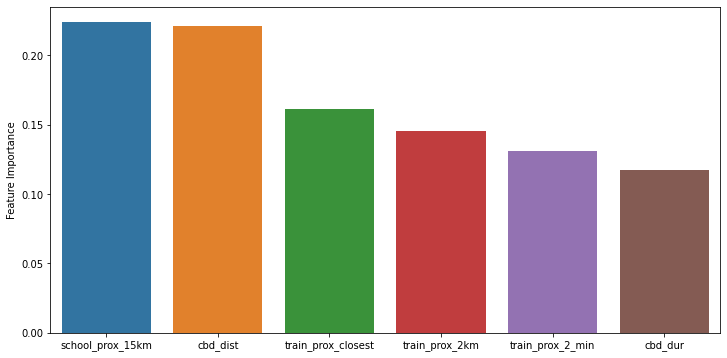

In [16]:
plt.figure(figsize=(12,6))
feat_import_plot = sns.barplot(y=feature_imp["Feature Importance"][0:6], x=feature_imp.index[0:6])

In [17]:
# These seem to be the most relevant additional features which are listed on domain 
# We want to save these for summary notebook:
fig = feat_import_plot.get_figure()
fig.savefig("../plots/feat_import_eexternal.png") 

In [18]:
feature_imp.to_csv('../plots/feature_importance_external.csv')